### 0.0. Dependencies

In [163]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1.1. Mobile App Data

#### 1.1.1. Loading in

In [164]:
## load mobile csv
mobile_csv = pd.read_csv("Data/Mobile_App_Data_Extract.csv")

In [165]:
print(mobile_csv.dtypes)

id                          int64
year                        int64
month                       int64
day                         int64
hour                        int64
acorn_group                object
home_country               object
work_country               object
home_distance_band_name    object
work_distance_band_name    object
events                      int64
dtype: object


In [166]:
print(len(mobile_csv))

47207158


In [167]:
#check cols
print(mobile_csv.columns)

Index(['id', 'year', 'month', 'day', 'hour', 'acorn_group', 'home_country',
       'work_country', 'home_distance_band_name', 'work_distance_band_name',
       'events'],
      dtype='object')


In [168]:
## load local footprint data
locF_lookup = pd.read_csv("Data/LOCF_ID_Look_Up.csv")
locF_data = pd.read_csv("Data/02 - Retail_Footprint_24_INTS_Local_Footprint.csv")

In [169]:
print(locF_lookup.dtypes)

id                   int64
LocF_CentreID       object
LocF_CentreName     object
CentroidX          float64
CentroidY          float64
dtype: object


In [170]:
print(locF_data.dtypes)

Centre_ID                                                  object
Name                                                       object
Short Name                                                 object
Region                                                     object
Major Class                                                 int64
Major Class Name                                           object
Minor Class                                                 int64
Minor Class Name                                           object
Base Score                                                  int64
Retail Footprint Score                                      int64
National Rank                                               int64
Regional Rank                                               int64
Total UK Centres                                            int64
Total Region Centres                                        int64
Total Class Centres                                         int64
Centre Typ

In [171]:
# check 
display(locF_lookup.sort_values(by='LocF_CentreID').head())
print(locF_data.columns)


id LocF_CentreID          LocF_CentreName  CentroidX  CentroidY
1544   1    01-0001-22         London - Tooting  -0.165694  51.427946
183    2    01-0002-22        London - East Ham   0.052224  51.539347
2987   3    01-0003-22      London - Old Street  -0.090509  51.525846
803    4    01-0004-22                   Hoxton  -0.093991  51.530838
2519   5    01-0005-22  London - Shepherds Bush  -0.225495  51.502832

Index(['Centre_ID', 'Name', 'Short Name', 'Region', 'Major Class',
       'Major Class Name', 'Minor Class', 'Minor Class Name', 'Base Score',
       'Retail Footprint Score', 'National Rank', 'Regional Rank',
       'Total UK Centres', 'Total Region Centres', 'Total Class Centres',
       'Centre Type Rank', 'Residential Population (Weighted Catchment)',
       'Spend Per Head (Residential)', 'Sparsity', 'Longitude', 'Latitude',
       '_Location_X', '_Location_Y', 'Tourism Score',
       'Local_Footprint_Centre_ID', 'Local_Footprint_Centre_Name', 'Town',
       'Universe_Region', 'Convenience_Score', 'Retail_Footprint_Score',
       'Retail_Footprint_Comparison_Retailer_Score', 'Leisure_Footprint_Score',
       'Auto_Score', 'Services_Provided:_Convenience_Food',
       'Services_Provided:_Specialist_Food_Store_/_Off_Licence',
       'Services_Provided:_Post_Office', 'Services_Provided:_Newsagent',
       'Services_Provided:_Chemist', 'Services_Provided:_Banking',
       'Services_Pr

In [172]:
## load locF shapefiles
locF_gdf = gpd.read_file("Data/Local_Footprint_Boundary.shp")
locF_gdf = locF_gdf.to_crs(epsg=27700)  # British National Grid

#### 1.1.2. LocF wrangling

Check for duplicates:

In [173]:
# check how many duplicate 'id' values exist
duplicate_ids = locF_lookup['LocF_CentreID'].duplicated().sum()
print(f"Duplicate ids in locF_lookup: {duplicate_ids}")
# check duplicates in Local_Footprint_Centre_ID
duplicate_centres = locF_data['Local_Footprint_Centre_ID'].duplicated().sum()
print(f"Duplicate ids in locF_data: {duplicate_centres}")

Duplicate ids in locF_lookup: 0
Duplicate ids in locF_data: 0


Create new df without irrelevant vars:

In [174]:
cols_to_keep = [
    'Local Footprint Name','Region', 'Base Score', 'Retail Footprint Score', 'Residential Population (Weighted Catchment)',
    'Spend Per Head (Residential)', 'Sparsity', 'Longitude', 'Latitude', 'Tourism Score',
    'Local_Footprint_Centre_ID', 'Local_Footprint_Centre_Name', 'Convenience_Score',
    'Retail_Footprint_Comparison_Retailer_Score', 'Leisure_Footprint_Score',
    'Auto_Score', 'Services_Provided:_Convenience_Food',
    'Services_Provided:_Specialist_Food_Store_/_Off_Licence',
    'Services_Provided:_Post_Office', 'Services_Provided:_Newsagent',
    'Services_Provided:_Chemist', 'Services_Provided:_Banking',
    'Services_Provided:_Petrol', 'Services_Provided:_Fast_Food_/_Takeaway',
    'Services_Provided:_Other_Convenience_Services',
    'Services_Provided:_Rail_or_Tube_Access',
    'Services_Provided:_Comparison_Retail', 'Services_Provided:_Leisure',
    'Services_Provided:_Auto_Dealers', 'Services_Provided:_DIY', 'Major_Class',
    'Major_Class_Name', 'Minor_Class', 'Minor_Class_Name',
    'Seasonality_Class', 'Seasonality_Class_Name'
]

# ensure the dataframe only has relevant columns
df_cleaned = locF_data[cols_to_keep].copy()
print(locF_data.columns)
print(df_cleaned.columns)

Index(['Centre_ID', 'Name', 'Short Name', 'Region', 'Major Class',
       'Major Class Name', 'Minor Class', 'Minor Class Name', 'Base Score',
       'Retail Footprint Score', 'National Rank', 'Regional Rank',
       'Total UK Centres', 'Total Region Centres', 'Total Class Centres',
       'Centre Type Rank', 'Residential Population (Weighted Catchment)',
       'Spend Per Head (Residential)', 'Sparsity', 'Longitude', 'Latitude',
       '_Location_X', '_Location_Y', 'Tourism Score',
       'Local_Footprint_Centre_ID', 'Local_Footprint_Centre_Name', 'Town',
       'Universe_Region', 'Convenience_Score', 'Retail_Footprint_Score',
       'Retail_Footprint_Comparison_Retailer_Score', 'Leisure_Footprint_Score',
       'Auto_Score', 'Services_Provided:_Convenience_Food',
       'Services_Provided:_Specialist_Food_Store_/_Off_Licence',
       'Services_Provided:_Post_Office', 'Services_Provided:_Newsagent',
       'Services_Provided:_Chemist', 'Services_Provided:_Banking',
       'Services_Pr

#### 1.1.3. Mobile wrangling

Date-time conversion:

In [175]:
print(mobile_csv['hour'].unique())

[ 9  5 11 10 15 22 16  8 14 21 19 13  6 18 17 20  4 12  0  7 23  1  3  2]


In [176]:
mobile_csv_convert = mobile_csv.copy()
mobile_csv_convert['datetime'] = pd.to_datetime(dict(
    year=mobile_csv_convert['year'],
    month=mobile_csv_convert['month'],
    day=mobile_csv_convert['day'],
    hour=mobile_csv_convert['hour']
))
mobile_csv_convert = mobile_csv_convert.drop(columns=['year', 'month', 'day', 'hour'])


Check the data:

In [177]:
display(mobile_csv_convert.head())

id acorn_group    home_country    work_country home_distance_band_name  \
0  27980           N  United Kingdom  United Kingdom                 50 km +   
1  20944           R  United Kingdom  United Kingdom              00 - 01 km   
2   3864           N  United Kingdom  United Kingdom              00 - 01 km   
3   1334           G  United Kingdom  United Kingdom              05 - 10 km   
4   8903           F  United Kingdom  United Kingdom              40 - 45 km   

  work_distance_band_name  events            datetime  
0                 50 km +      22 2024-04-05 09:00:00  
1              00 - 01 km      25 2024-02-14 09:00:00  
2                 50 km +       3 2024-01-23 05:00:00  
3              00 - 01 km      26 2024-08-23 11:00:00  
4              40 - 45 km      21 2024-02-21 10:00:00

In [178]:
display(mobile_csv_convert.sort_values(by='id').head())

id acorn_group    home_country    work_country  \
25310044   1           E  United Kingdom  United Kingdom   
251        1           G  United Kingdom  United Kingdom   
40660053   1           N  United Kingdom  United Kingdom   
30009782   1           H  United Kingdom  United Kingdom   
45286495   1           J  United Kingdom  United Kingdom   

         home_distance_band_name work_distance_band_name  events  \
25310044              01 - 05 km              00 - 01 km       4   
251                   10 - 15 km                 50 km +      21   
40660053              01 - 05 km               0 - 05 km       2   
30009782              01 - 05 km              00 - 01 km       5   
45286495              05 - 10 km               0 - 05 km       1   

                    datetime  
25310044 2024-03-29 14:00:00  
251      2024-10-31 13:00:00  
40660053 2024-02-14 14:00:00  
30009782 2024-04-17 00:00:00  
45286495 2024-10-23 13:00:00

In [179]:
df_filtered = mobile_csv_convert[mobile_csv_convert['id'] == 20944].sort_values(by='datetime')
display(df_filtered.iloc[50:60][['datetime']])

datetime
17593705 2024-01-01 16:00:00
38815683 2024-01-01 16:00:00
26216004 2024-01-01 16:00:00
10485045 2024-01-01 17:00:00
32343640 2024-01-01 17:00:00
24582281 2024-01-01 17:00:00
28033286 2024-01-01 17:00:00
33152362 2024-01-01 17:00:00
46628795 2024-01-01 18:00:00
40776243 2024-01-01 18:00:00

Plot hourly footfall:

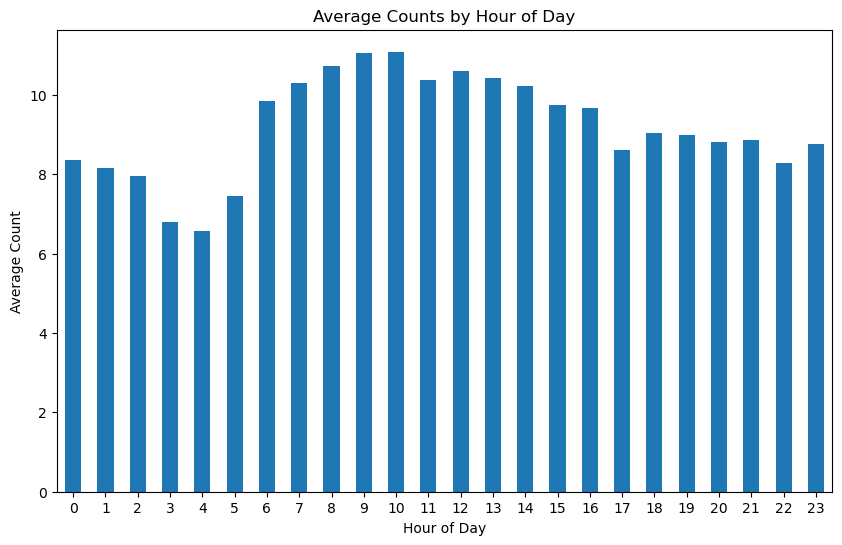

In [180]:
# extract hour from datetime
df_filtered['hour'] = df_filtered['datetime'].dt.hour

# group by hour and compute average count
avg_counts_by_hour = df_filtered.groupby('hour')['events'].mean()

# plot
plt.figure(figsize=(10,6))
avg_counts_by_hour.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.title('Average Counts by Hour of Day')
plt.xticks(rotation=0)
plt.show()

Generate daily footfall counts:

In [181]:
# extract date (without time) from datetime
mobile_csv_convert['date'] = mobile_csv_convert['datetime'].dt.date

# group by date and id, then sum events
mobile_daily = (
    mobile_csv_convert
    .groupby(['date', 'id'])['events']
    .sum()
    .reset_index()
)

display(mobile_csv_convert)
display(mobile_daily.head())
len(mobile_daily)

id acorn_group    home_country    work_country  \
0         27980           N  United Kingdom  United Kingdom   
1         20944           R  United Kingdom  United Kingdom   
2          3864           N  United Kingdom  United Kingdom   
3          1334           G  United Kingdom  United Kingdom   
4          8903           F  United Kingdom  United Kingdom   
...         ...         ...             ...             ...   
47207153  18929           U  United Kingdom  United Kingdom   
47207154     48           S  United Kingdom  United Kingdom   
47207155   2577           E  United Kingdom  United Kingdom   
47207156  26004           K  United Kingdom  United Kingdom   
47207157  18908           O  United Kingdom  United Kingdom   

         home_distance_band_name work_distance_band_name  events  \
0                        50 km +                 50 km +      22   
1                     00 - 01 km              00 - 01 km      25   
2                     00 - 01 km                 50 km +       3   
3                     05 - 10 km              00 - 01 km      26   
4                     40 - 45 km              40 - 45 km      21   
...                          ...                     ...     ...   
47207153              01 - 05 km              00 - 01 km       1   
47207154              10 - 15 km              00 - 01 km       2   
47207155              05 - 10 km              05 - 10 km       1   
47207156              01 - 05 km                 50 km +       2   
47207157              10 - 15 km               0 - 05 km       1   

                    datetime        date  
0        2024-04-05 09:00:00  2024-04-05  
1        2024-02-14 09:00:00  2024-02-14  
2        2024-01-23 05:00:00  2024-01-23  
3        2024-08-23 11:00:00  2024-08-23  
4        2024-02-21 10:00:00  2024-02-21  
...                      ...         ...  
47207153 2024-01-26 10:00:00  2024-01-26  
47207154 2024-03-21 15:00:00  2024-03-21  
47207155 2024-06-06 11:00:00  2024-06-06  
47207156 2024-07-07 14:00:00  2024-07-07  
47207157 2024-04-26 16:00:00  2024-04-26  

[47207158 rows x 9 columns]

date  id  events
0  2024-01-01   1    1714
1  2024-01-01   2    3148
2  2024-01-01   3     692
3  2024-01-01   4      27
4  2024-01-01   5    2164

1059996

Determine weekday/weekend season:

In [182]:
mobile_daily['date'] = pd.to_datetime(mobile_daily['date'])

# add weekend column (True if Saturday or Sunday)
mobile_daily['weekend'] = mobile_daily['date'].dt.dayofweek >= 5

# define a function to assign seasons (Northern Hemisphere, 2024)
def get_season(date):
    Y = date.year
    if pd.Timestamp(f'{Y}-03-20') <= date < pd.Timestamp(f'{Y}-06-20'):
        return 'Spring'
    elif pd.Timestamp(f'{Y}-06-20') <= date < pd.Timestamp(f'{Y}-09-22'):
        return 'Summer'
    elif pd.Timestamp(f'{Y}-09-22') <= date < pd.Timestamp(f'{Y}-12-21'):
        return 'Autumn'
    else:
        return 'Winter'

# add season column
mobile_daily['season'] = mobile_daily['date'].apply(get_season)

# display updated DataFrame
display(mobile_daily.head())

date  id  events  weekend  season
0 2024-01-01   1    1714    False  Winter
1 2024-01-01   2    3148    False  Winter
2 2024-01-01   3     692    False  Winter
3 2024-01-01   4      27    False  Winter
4 2024-01-01   5    2164    False  Winter

Determine holidays:

In [183]:
# define UK bank holidays in 2024
uk_holidays_2024 = pd.to_datetime([
    '2024-01-01',  # New Year’s Day
    '2024-03-29',  # Good Friday
    '2024-04-01',  # Easter Monday
    '2024-05-06',  # Early May bank holiday
    '2024-05-27',  # Spring bank holiday
    '2024-08-26',  # Summer bank holiday
    '2024-12-25',  # Christmas Day
    '2024-12-26'   # Boxing Day
])

# add holiday column (True if the date is a holiday)
mobile_daily['holiday'] = mobile_daily['date'].isin(uk_holidays_2024)

# display updated df
display(mobile_daily.head())

date  id  events  weekend  season  holiday
0 2024-01-01   1    1714    False  Winter     True
1 2024-01-01   2    3148    False  Winter     True
2 2024-01-01   3     692    False  Winter     True
3 2024-01-01   4      27    False  Winter     True
4 2024-01-01   5    2164    False  Winter     True

#### 1.1.4. Merging

Mobile & locF data merge:

In [184]:
## join locF id with mobile data based on lookup table 
mobile_locF = mobile_daily.merge(locF_lookup[['id', 'LocF_CentreID']], how='left', on='id')

In [185]:
## join locF data with mobile data
mobile_locF = mobile_locF.merge(df_cleaned, how='inner', left_on='LocF_CentreID', right_on='Local_Footprint_Centre_ID')
mobile_locF = mobile_locF.drop(columns=['LocF_CentreID']) # drop redundant column

In [186]:
# check the number or rows matches the initial mobile data 
print(len(mobile_daily))
print(len(mobile_locF))

1059996
816193


In [187]:
# check cols
print(mobile_locF.columns)


Index(['date', 'id', 'events', 'weekend', 'season', 'holiday',
       'Local Footprint Name', 'Region', 'Base Score',
       'Retail Footprint Score', 'Residential Population (Weighted Catchment)',
       'Spend Per Head (Residential)', 'Sparsity', 'Longitude', 'Latitude',
       'Tourism Score', 'Local_Footprint_Centre_ID',
       'Local_Footprint_Centre_Name', 'Convenience_Score',
       'Retail_Footprint_Comparison_Retailer_Score', 'Leisure_Footprint_Score',
       'Auto_Score', 'Services_Provided:_Convenience_Food',
       'Services_Provided:_Specialist_Food_Store_/_Off_Licence',
       'Services_Provided:_Post_Office', 'Services_Provided:_Newsagent',
       'Services_Provided:_Chemist', 'Services_Provided:_Banking',
       'Services_Provided:_Petrol', 'Services_Provided:_Fast_Food_/_Takeaway',
       'Services_Provided:_Other_Convenience_Services',
       'Services_Provided:_Rail_or_Tube_Access',
       'Services_Provided:_Comparison_Retail', 'Services_Provided:_Leisure',
       '

In [188]:
# display all columns and their values for the first few rows
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(mobile_locF.head())

date  id  events  weekend  season  holiday     Local Footprint Name  \
0 2024-01-01   1    1714    False  Winter     True         London - Tooting   
1 2024-01-01   2    3148    False  Winter     True        London - East Ham   
2 2024-01-01   3     692    False  Winter     True      London - Old Street   
3 2024-01-01   5    2164    False  Winter     True  London - Shepherds Bush   
4 2024-01-01   6    1759    False  Winter     True         London - Peckham   

   Region  Base Score  Retail Footprint Score  \
0  London         472                     507   
1  London         358                     389   
2  London         157                     165   
3  London         398                     423   
4  London         314                     339   

   Residential Population (Weighted Catchment)  Spend Per Head (Residential)  \
0                                        54173                   1933.087727   
1                                        53781                   1733.492583   
2                                         7862                   1892.654325   
3                                        13418                   1972.601453   
4                                        22947                   1885.443578   

                   Sparsity  Longitude   Latitude  Tourism Score  \
0  5 - Urban Dense (London)  -0.166467  51.428020      59.668318   
1  5 - Urban Dense (London)   0.054717  51.540270      25.178087   
2  5 - Urban Dense (London)  -0.091799  51.526522     715.736173   
3  5 - Urban Dense (London)  -0.227470  51.502096     160.154406   
4  5 - Urban Dense (London)  -0.069161  51.470036     118.639624   

  Local_Footprint_Centre_ID Local_Footprint_Centre_Name  Convenience_Score  \
0                01-0001-22            London - Tooting              453.0   
1                01-0002-22           London - East Ham              374.0   
2                01-0003-22         London - Old Street              340.0   
3                01-0005-22     London - Shepherds Bush              368.0   
4                01-0006-22            London - Peckham              320.0   

   Retail_Footprint_Comparison_Retailer_Score  Leisure_Footprint_Score  \
0                                       254.0                    684.0   
1                                       227.0                    409.0   
2                                        51.0                    307.0   
3                                       169.0                    698.0   
4                                       181.0                    410.0   

   Auto_Score Services_Provided:_Convenience_Food  \
0         0.0                                   T   
1         0.0                                   T   
2         0.0                                   T   
3         0.0                                   T   
4         0.0                                   T   

  Services_Provided:_Specialist_Food_Store_/_Off_Licence  \
0                                                  T       
1                                                  T       
2                                                  T       
3                                                  T       
4                                                  T       

  Services_Provided:_Post_Office Services_Provided:_Newsagent  \
0                              T                            T   
1                              T                            T   
2                              T                            T   
3                              T                            T   
4                              T                            T   

  Services_Provided:_Chemist Services_Provided:_Banking  \
0                          T                          T   
1                          T                          T   
2                          T                          F   
3                          T                          T   
4                          T                          T   

  Servic

Check for NAs:

In [189]:
# print NA sums
display(mobile_locF.isna().sum())

date                                                         0
id                                                           0
events                                                       0
weekend                                                      0
season                                                       0
holiday                                                      0
Local Footprint Name                                         0
Region                                                       0
Base Score                                                   0
Retail Footprint Score                                       0
Residential Population (Weighted Catchment)                  0
Spend Per Head (Residential)                                 0
Sparsity                                                     0
Longitude                                                    0
Latitude                                                     0
Tourism Score                                          

In [190]:
na_tourism = mobile_locF[mobile_locF['Tourism Score'].isna()]
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(na_tourism)

date     id  events  weekend  season  holiday  \
212    2024-01-01   1350    1348    False  Winter     True   
229    2024-01-01   1459    1447    False  Winter     True   
255    2024-01-01   1614     748    False  Winter     True   
502    2024-01-01   5834     101    False  Winter     True   
529    2024-01-01   6156      32    False  Winter     True   
...           ...    ...     ...      ...     ...      ...   
815644 2024-12-31  26099      54    False  Winter    False   
815709 2024-12-31  27386      23    False  Winter    False   
815834 2024-12-31  29646      83    False  Winter    False   
815856 2024-12-31  30277      20    False  Winter    False   
815870 2024-12-31  30667     580    False  Winter    False   

             Local Footprint Name                    Region  Base Score  \
212     London Heathrow Airport -                    London         300   
229     London Heathrow Airport -                    London         160   
255     London Heathrow Airport -                    London         189   
502     Doncaster - Dome Leisure   Yorkshire and The Humber          29   
529     Stocksbridge - Fox Valley  Yorkshire and The Humber         161   
...                           ...                       ...         ...   
815644     Moto Wetherby Services  Yorkshire and The Humber          46   
815709   Cherwell Valley Services                South East          53   
815834            Cobham Services                South East          60   
815856            Corley Services             West Midlands          23   
815870  London Gatwick Airport -                 South East         213   

        Retail Footprint Score  Residential Population (Weighted Catchment)  \
212                        343                                            0   
229                        182                                            0   
255                        215                                            0   
502                         29                                            0   
529                        138                                        20252   
...                        ...                                          ...   
815644                      44                                            0   
815709                      47                                            0   
815834                      54                                            0   
815856                      22                                            0   
815870                     188                                            0   

        Spend Per Head (Residential)                  Sparsity  Longitude  \
212                          0.00000  5 - Urban Dense (London)  -0.487946   
229                          0.00000  5 - Urban Dense (London)  -0.451302   
255                          0.00000  5 - Urban Dense (London)  -0.458626   
502                          0.00000           6 - Retail Park  -1.104043   
529                       2155.71929           2 - Small Urban  -1.586133   
...                              ...                       ...        ...   
815644                       0.00000                 3 - Urban  -1.368609   
815709                       0.00000           2 - Small Urban  -1.199487   
815834                       0.00000           2 - Small Urban  -0.405497   
815856                       0.00000           2 - Small Urban  -1.546500   
815870                       0.00000           2 - Small Urban  -0.162786   

         Latitude  Tourism Score Local_Footprint_Centre_ID  \
212     51.471608            NaN                02-0153-22   
229     51.470321            NaN                02-0262-22   
255     51.470903            NaN                02-0416-22   
502     53.514081            NaN                05-0125-22   
529     53.482745            NaN                05-0444-24   
...           ...            ...                       ...   
815644  53.946891            NaN                37-0101-22 

In [191]:
na_class = mobile_locF[mobile_locF['Major_Class_Name'].isna()]
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(na_class)

date    id  events  weekend  season  holiday  \
90     2024-01-01   418     153    False  Winter     True   
116    2024-01-01   615      65    False  Winter     True   
147    2024-01-01  1074      75    False  Winter     True   
148    2024-01-01  1076      22    False  Winter     True   
149    2024-01-01  1078      20    False  Winter     True   
...           ...   ...     ...      ...     ...      ...   
814118 2024-12-31  1076      24    False  Winter    False   
814119 2024-12-31  1078     128    False  Winter    False   
814512 2024-12-31  6156     188    False  Winter    False   
814629 2024-12-31  7864      25    False  Winter    False   
814721 2024-12-31  9600      24    False  Winter    False   

             Local Footprint Name                    Region  Base Score  \
90          Hoxton - Murray Grove                    London         157   
116           London - Bell Green                    London         219   
147       Hoxton - New North Road                    London         433   
148     Kensington - West Cromwel                    London         153   
149     London - Kensington - Cro                    London         153   
...                           ...                       ...         ...   
814118  Kensington - West Cromwel                    London         153   
814119  London - Kensington - Cro                    London         153   
814512  Stocksbridge - Fox Valley  Yorkshire and The Humber         161   
814629  West Bromwich - Kings Squ             West Midlands         561   
814721  Bradford - Lower Kirkgate  Yorkshire and The Humber         718   

        Retail Footprint Score  Residential Population (Weighted Catchment)  \
90                         165                                         7862   
116                        211                                        30897   
147                        449                                        30181   
148                        162                                         3847   
149                        162                                         3847   
...                        ...                                          ...   
814118                     162                                         3847   
814119                     162                                         3847   
814512                     138                                        20252   
814629                     608                                        70740   
814721                     783                                       204557   

        Spend Per Head (Residential)                  Sparsity  Longitude  \
90                       1892.654325  5 - Urban Dense (London)  -0.091799   
116                      1810.689108           6 - Retail Park  -0.034461   
147                      1812.007827  5 - Urban Dense (London)  -0.075624   
148                      2184.499509  5 - Urban Dense (London)  -0.192340   
149                      2184.499509  5 - Urban Dense (London)  -0.192340   
...                              ...                       ...        ...   
814118                   2184.499509  5 - Urban Dense (London)  -0.192340   
814119                   2184.499509  5 - Urban Dense (London)  -0.192340   
814512                   2155.719290           2 - Small Urban  -1.586133   
814629                   1527.630413           4 - Urban Dense  -1.994132   
814721                   1678.237602           4 - Urban Dense  -1.754075   

         Latitude  Tourism Score Local_Footprint_Centre_ID  \
90      51.526522     715.736173                01-0417-24   
116     51.429477      71.370285                01-0610-24   
147     51.528560     625.599497                01-1063-24   
148     51.490112     378.022527                01-1064-24   
149     51.490112     378.022527                01-1065-24   
...           ...            ...                       ...   
814118  51.490112     378.022527                01-1064-24   
814119  5

GeoData merge:

In [192]:
print(locF_gdf.columns)

Index(['Local_Foot', 'geometry'], dtype='object')


In [193]:
# get rows with duplicated Local_Foot values
duplicates = locF_gdf[locF_gdf['Local_Foot'].duplicated(keep=False)]
# sort so duplicate groups are adjacent
duplicates = duplicates.sort_values(by='Local_Foot')
# display info
print(f"Number of duplicate 'Local_Foot' values: {duplicates['Local_Foot'].nunique()}")
display(duplicates)

Number of duplicate 'Local_Foot' values: 90


Local_Foot                                           geometry
142   01-0001-22  POLYGON ((527684.669 172540.771, 527676.696 17...
75    01-0001-22  POLYGON ((527684.669 172540.771, 527676.696 17...
79    01-0003-22  MULTIPOLYGON (((532775.733 182730.793, 532794....
231   01-0003-22  MULTIPOLYGON (((532775.733 182730.793, 532794....
69    01-0009-22  POLYGON ((530260.754 175176.804, 530275.709 17...
...          ...                                                ...
2430  63-0260-22  POLYGON ((257066.733 666676.716, 257074.784 66...
2688  63-0472-22  POLYGON ((257857.769 666078.666, 257858.777 66...
654   63-0472-22  POLYGON ((257857.769 666078.666, 257858.777 66...
2406  63-1089-22  POLYGON ((257126.777 666905.639, 257127.748 66...
2429  63-1089-22  POLYGON ((257126.777 666905.639, 257127.748 66...

[182 rows x 2 columns]

We can see the geometry is identical, so let's get rid of duplicate occurences. 

In [194]:
locF_gdf = locF_gdf.drop_duplicates(subset='Local_Foot', keep='first')
len(locF_gdf)

2999

In [195]:
## merge with gdf
mobile_locF_gdf= locF_gdf.merge(mobile_locF, left_on='Local_Foot', right_on='Local_Footprint_Centre_ID', how='left')
mobile_locF_gdf = mobile_locF_gdf.drop(columns=['Local_Foot'])

In [196]:
print(mobile_locF_gdf.columns)
print(len(mobile_daily))
print(len(mobile_locF_gdf))

Index(['geometry', 'date', 'id', 'events', 'weekend', 'season', 'holiday',
       'Local Footprint Name', 'Region', 'Base Score',
       'Retail Footprint Score', 'Residential Population (Weighted Catchment)',
       'Spend Per Head (Residential)', 'Sparsity', 'Longitude', 'Latitude',
       'Tourism Score', 'Local_Footprint_Centre_ID',
       'Local_Footprint_Centre_Name', 'Convenience_Score',
       'Retail_Footprint_Comparison_Retailer_Score', 'Leisure_Footprint_Score',
       'Auto_Score', 'Services_Provided:_Convenience_Food',
       'Services_Provided:_Specialist_Food_Store_/_Off_Licence',
       'Services_Provided:_Post_Office', 'Services_Provided:_Newsagent',
       'Services_Provided:_Chemist', 'Services_Provided:_Banking',
       'Services_Provided:_Petrol', 'Services_Provided:_Fast_Food_/_Takeaway',
       'Services_Provided:_Other_Convenience_Services',
       'Services_Provided:_Rail_or_Tube_Access',
       'Services_Provided:_Comparison_Retail', 'Services_Provided:_Leisur

In [197]:
print("Unique Major Classes:", mobile_locF_gdf['Major_Class_Name'].unique())
print("Unique Minor Classes:", mobile_locF_gdf['Minor_Class_Name'].unique())

Unique Major Classes: ['Standalone' 'City Centre' 'Retail Park' 'Transient' 'Local High Street'
 nan 'Local Parade' 'Retail Destination']
Unique Minor Classes: ['Residential' 'Convenience and Services' 'Leisure Park'
 'Secondary Retail' 'Major Retail' 'Station'
 'Specialist Eating and Drinking' nan 'Worker'
 'Mainstream Eating and Drinking' 'Convenience' 'Discount Retail'
 'Independent Bars Cafes and Restaurants' 'Strong Urban Parade'
 'Local Mall' 'Urban High Street' 'Pharmacy' 'Retail Park'
 'Late Night Entertainment' 'Premium Retail' 'Supermarket'
 'Major Urban Centre' 'Independent Retail' 'Outlet Centre'
 'Small Urban Parade' 'Regional Town' 'Catering' 'Shopping Park'
 'Railway and Underground Station' 'Petrol Station'
 'Small Takeaway and Catering' 'Local Town' 'Small Rural Centre'
 'Rural Centre' 'Local Rural Centre' 'Motorway' 'Bank or Building Society']


### 1.2. Retail Typology Data

#### 1.2.1. Loading in

In [198]:
typology = gpd.read_file("Data/typology_2022.gpkg")
typology = typology.to_crs(epsg=27700)

In [199]:
print(typology['supergroupName'].unique())
print(typology['groupName'].unique())

["Local 'everyday' goods and service centres" 'Retail and shopping parks'
 'Leading comparison and leisure destinations'
 'Traditional high streets and market towns']
['Local urban convenience centres' 'District urban service centres'
 'Secondary retail parks and shopping centres'
 'Large regional retail and leisure destinations'
 'Mass and value high streets' 'Indie high streets'
 'Sub-regional retail and leisure destinations'
 'Primary shopping centres and premium destinations']


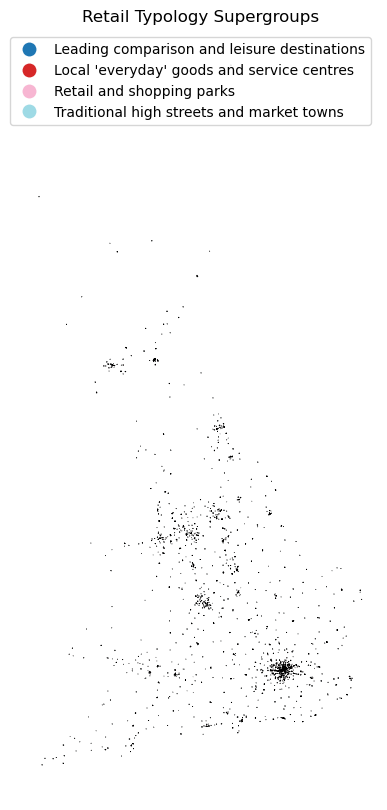

In [200]:
# plot the typology GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
typology.plot(column="supergroupName", ax=ax, legend=True, cmap="tab20", edgecolor="black", linewidth=0.5)
ax.set_title("Retail Typology Supergroups")
ax.set_axis_off()
plt.show()

#### 1.2.2. Spatial intersection

In [201]:
# step 1: spatial intersection
intersected = gpd.overlay(mobile_locF_gdf, typology, how='intersection')

# step 2: add area column for filtering
intersected['area'] = intersected.geometry.area

# step 3: sort by area descending so largest is on top
intersected_sorted = intersected.sort_values('area', ascending=False)

# step 4: drop duplicates, keeping only the largest (first) for each ID
retail_areas = intersected_sorted.drop_duplicates(
    subset=['Local_Footprint_Centre_ID', 'date'], 
    keep='first'
)

# drop the temporary area column
retail_areas = retail_areas.drop(columns='area')

# drop rows where Local_Footprint_Centre_ID is NaN
retail_areas = retail_areas[retail_areas['Local_Footprint_Centre_ID'].notna()]

In [202]:
retail_areas = retail_areas[retail_areas['Local_Footprint_Centre_ID'].notna()]

In [203]:
print(len(locF_gdf))
print(len(retail_areas['Local_Footprint_Centre_ID'].unique()))

2999
1207


In [204]:
display(retail_areas.head())

date       id  events weekend  season holiday  \
369521 2024-10-11  17519.0   787.0   False  Autumn   False   
369585 2024-12-14  17519.0  2128.0    True  Autumn   False   
369578 2024-12-07  17519.0  1621.0    True  Autumn   False   
369580 2024-12-09  17519.0  1471.0   False  Autumn   False   
369579 2024-12-08  17519.0  1270.0    True  Autumn   False   

         Local Footprint Name           Region  Base Score  \
369521  Grays - West Thurrock  East of England       802.0   
369585  Grays - West Thurrock  East of England       802.0   
369578  Grays - West Thurrock  East of England       802.0   
369580  Grays - West Thurrock  East of England       802.0   
369579  Grays - West Thurrock  East of England       802.0   

        Retail Footprint Score  ...  Minor_Class_Name  Seasonality_Class  \
369521                   767.0  ...     Shopping Park                1.0   
369585                   767.0  ...     Shopping Park                1.0   
369578                   767.0  ...     Shopping Park                1.0   
369580                   767.0  ...     Shopping Park                1.0   
369579                   767.0  ...     Shopping Park                1.0   

       Seasonality_Class_Name       RC_ID  \
369521           Not seasonal  RC_EW_2382   
369585           Not seasonal  RC_EW_2382   
369578           Not seasonal  RC_EW_2382   
369580           Not seasonal  RC_EW_2382   
369579           Not seasonal  RC_EW_2382   

                                                  RC_Name  supergroupID  \
369521  Lakeside Shopping Centre; Thurrock (East of En...             2   
369585  Lakeside Shopping Centre; Thurrock (East of En...             2   
369578  Lakeside Shopping Centre; Thurrock (East of En...             2   
369580  Lakeside Shopping Centre; Thurrock (East of En...             2   
369579  Lakeside Shopping Centre; Thurrock (East of En...             2   

                   supergroupName groupID  \
369521  Retail and shopping parks     2.1   
369585  Retail and shopping parks     2.1   
369578  Retail and shopping parks     2.1   
369580  Retail and shopping parks     2.1   
369579  Retail and shopping parks     2.1   

                                                groupName  \
369521  Primary shopping centres and premium destinations   
369585  Primary shopping centres and premium destinations   
369578  Primary shopping centres and premium destinations   
369580  Primary shopping centres and premium destinations   
369579  Primary shopping centres and premium destinations   

                                                 geometry  
369521  POLYGON ((558658.855 178000.076, 558656.199 17...  
369585  POLYGON ((558658.855 178000.076, 558656.199 17...  
369578  POLYGON ((558658.855 178000.076, 558656.199 17...  
369580  POLYGON ((558658.855 178000.076, 558656.199 17...  
369579  POLYGON ((558658.855 178000.076, 558656.199 17...  

[5 rows x 49 columns]

### 1.3. Coastal Identifier

#### 1.3.1. Load GADm data

In [205]:
uk_boundary = gpd.read_file("Data/UK_boundary/gadm41_GBR_0.shp")

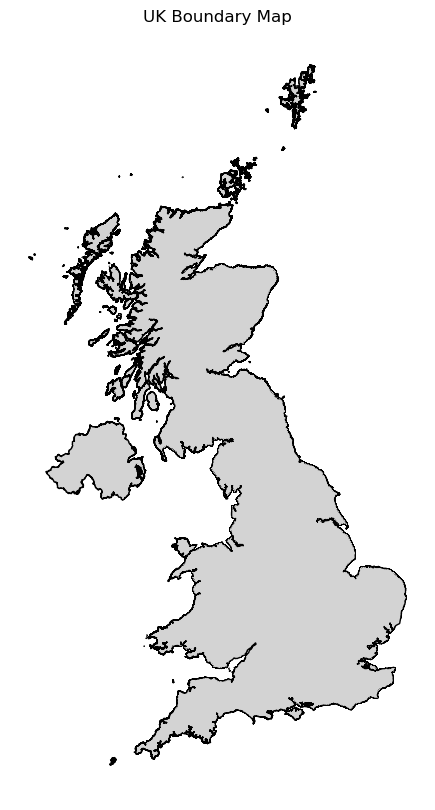

In [206]:
uk_boundary.plot(figsize=(8, 10), edgecolor='black', facecolor='lightgray')
plt.title("UK Boundary Map")
plt.axis('off')
plt.show()

In [207]:
print("retail_areas CRS:", retail_areas.crs)
print("uk_boundary CRS:", uk_boundary.crs)

retail_areas CRS: EPSG:27700
uk_boundary CRS: EPSG:4326


In [208]:
uk_boundary = uk_boundary.to_crs(retail_areas.crs)

In [209]:
uk_buffer = uk_boundary.buffer(-2000)

In [210]:
uk_buffer_gdf = gpd.GeoDataFrame(geometry=uk_buffer, crs=uk_boundary.crs)
uk_buffer_gdf.to_file("uk_buffer.gpkg", layer="uk_buffer", driver="GPKG")

In [211]:
# ensure uk_geom is a single unified geometry
if isinstance(uk_buffer, gpd.GeoDataFrame):
    uk_geom = uk_buffer.geometry.union_all()
elif isinstance(uk_buffer, gpd.GeoSeries):
    uk_geom = uk_buffer.union_all()
else:
    uk_geom = uk_buffer  # already a geometry

In [212]:
# if centroid is outside of buffer, classify as 'coastal'
retail_areas['coastal'] = retail_areas.geometry.centroid.apply(
    lambda pt: 'coastal' if not pt.within(uk_geom) else 'inland'
)

In [213]:
display(retail_areas.head())

date       id  events weekend  season holiday  \
369521 2024-10-11  17519.0   787.0   False  Autumn   False   
369585 2024-12-14  17519.0  2128.0    True  Autumn   False   
369578 2024-12-07  17519.0  1621.0    True  Autumn   False   
369580 2024-12-09  17519.0  1471.0   False  Autumn   False   
369579 2024-12-08  17519.0  1270.0    True  Autumn   False   

         Local Footprint Name           Region  Base Score  \
369521  Grays - West Thurrock  East of England       802.0   
369585  Grays - West Thurrock  East of England       802.0   
369578  Grays - West Thurrock  East of England       802.0   
369580  Grays - West Thurrock  East of England       802.0   
369579  Grays - West Thurrock  East of England       802.0   

        Retail Footprint Score  ...  Seasonality_Class  \
369521                   767.0  ...                1.0   
369585                   767.0  ...                1.0   
369578                   767.0  ...                1.0   
369580                   767.0  ...                1.0   
369579                   767.0  ...                1.0   

        Seasonality_Class_Name       RC_ID  \
369521            Not seasonal  RC_EW_2382   
369585            Not seasonal  RC_EW_2382   
369578            Not seasonal  RC_EW_2382   
369580            Not seasonal  RC_EW_2382   
369579            Not seasonal  RC_EW_2382   

                                                  RC_Name  supergroupID  \
369521  Lakeside Shopping Centre; Thurrock (East of En...             2   
369585  Lakeside Shopping Centre; Thurrock (East of En...             2   
369578  Lakeside Shopping Centre; Thurrock (East of En...             2   
369580  Lakeside Shopping Centre; Thurrock (East of En...             2   
369579  Lakeside Shopping Centre; Thurrock (East of En...             2   

                   supergroupName groupID  \
369521  Retail and shopping parks     2.1   
369585  Retail and shopping parks     2.1   
369578  Retail and shopping parks     2.1   
369580  Retail and shopping parks     2.1   
369579  Retail and shopping parks     2.1   

                                                groupName  \
369521  Primary shopping centres and premium destinations   
369585  Primary shopping centres and premium destinations   
369578  Primary shopping centres and premium destinations   
369580  Primary shopping centres and premium destinations   
369579  Primary shopping centres and premium destinations   

                                                 geometry  coastal  
369521  POLYGON ((558658.855 178000.076, 558656.199 17...   inland  
369585  POLYGON ((558658.855 178000.076, 558656.199 17...   inland  
369578  POLYGON ((558658.855 178000.076, 558656.199 17...   inland  
369580  POLYGON ((558658.855 178000.076, 558656.199 17...   inland  
369579  POLYGON ((558658.855 178000.076, 558656.199 17...   inland  

[5 rows x 50 columns]

In [214]:
# write the retail_areas GeoDataFrame to a GeoPackage
retail_areas.to_file("retail_areas.gpkg", layer="retail_areas", driver="GPKG")